In [1]:
%matplotlib inline
# import tensorflow_addons as tfa
from os import listdir, makedirs
from os.path import isfile, join, basename, splitext, isfile, exists
import tensorflow 
from tensorflow.keras.metrics import top_k_categorical_accuracy, CategoricalHinge, Recall, Precision
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
# from tqdm import tqdm_notebook

import tensorflow as tf
import tensorflow.keras.backend as K
# from tensorflow.keras import metrics

import tensorflow.keras
from tensorflow.compat.v2.keras.layers import Input

import matplotlib.pyplot as plt
# import seaborn as sns

import random, os, sys
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
import tensorflow as tf
from tensorflow.python.keras.layers import Layer
import h5py
import os

tf.compat.v1.disable_eager_execution
pd.set_option('display.precision', 30)
np.set_printoptions(precision = 30)
tf.config.list_physical_devices('GPU')  
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#np.random.seed(368)
#tf.random.set_seed(368)

Num GPUs Available:  1


In [2]:
xfileName='xau_usd_3.0Tp3.0Cl100Vp-zipzag10_20_100.txt'
xfile='C:\\workspace\\j6stock\\' + xfileName

# seq_len = 60 * 4 #60*10 # 3 days + 2 features is enough memory
seq_len = 30 #60*10 # 3 days + 2 features is enough memory

batch_size = int(1024/2/2)       # Batch size
# mini_batch_size = 64       # Batch size

learning_rate = 0.005  #0.0001  # Learning rate (default is 0.001)
epochs = 500


y_column = 6
compute_val_at = 0
acc_filtered_r = 0.8


upperTailFilter = 0.4
lowerTailFilter = 0.4

import tensorflow as tf
from tensorflow.python import debug as tf_debug
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
#from keras.models import Sequential
#from keras.layers.core import Dense, Dropout, Activation
#from keras.layers.recurrent import LSTM
#from keras.models import load_model
#import keras
import pandas as pd ## can be remove once pandas_datareader 0.7 using
pd.core.common.is_list_like = pd.api.types.is_list_like ## can be remove once pandas_datareader 0.7 using
import pandas_datareader.data as web



def get_stock_data(normalize=True, ma=[]):
    """
    Return a dataframe of that stock and normalize all the values. 
    (Optional: create moving average)
    """
    global upperTailFilter, lowerTailFilter
    
    df = pd.read_csv(filepath_or_buffer  = xfile )

    return df

df = get_stock_data()

# amount_of_features = len(df.columns)-1+(input2Length*-1)

# def load_data(stock, seq_len):
#     print ("Amount of features = {}".format(amount_of_features))
#     data = stock.as_matrix()
#     sequence_length = seq_len + 1 # index starting from 0
#     x_result = []
#     x_result2 = []
#     y_result = []
#     for index in range(seq_len, len(data) ): # maxmimum date = lastest date - sequence length
#         x_result.append(data[index-seq_len: index,
#                              :-1 + (input2Length*-1) # -2 is ignore Input2 features
#                             ]) # index : index + 22days
#         x_result2.append(data[index, -1 + (input2Length*-1):-1])
#         y_result.append(data[index ,-1]);

#     x_result, x_result2, y_result = shuffle(x_result, x_result2, y_result , random_state=2)

#     #print('---', data[0])
#     #print('---', x_result[0])
#     #print('---', y_result[0])
#     x_result = np.array(x_result)
#     x_result2 = np.array(x_result2)
#     y_result = np.array(y_result)
#     print ("Amount of data = {}".format(y_result.shape[0]))

#     percentageSplit = 0.5 # 60% split
#     row = round(percentageSplit * y_result.shape[0]) 
#     print ("Split = {}".format(row))
 
#     X_train = x_result[:int(row), :] 
#     X_train2 = x_result2[:int(row), :] 
#     y_train = y_result[:int(row)] 
#     print ("Amount of training data = {}".format(y_train.shape[0]))
#     X_test = x_result[int(row):, :]
#     X_test2 = x_result2[int(row):, :]
#     y_test = y_result[int(row):]
#     # filter for 1 and -1 for validation only
#     X_test = X_test[y_test[:]!=0,:]
#     X_test2 = X_test2[y_test[:]!=0,:]
#     y_test = y_test[y_test[:]!=0]
    
#     # split 50% again for test and validation set
#     row = round(percentageSplit * y_test.shape[0]) 
#     X_val = X_test[int(row):, :]
#     X_val2 = X_test2[int(row):, :]
#     y_val = y_test[int(row):]
#     print ("Amount of validation data = {}".format(y_val.shape[0]))
#     X_test = X_test[:int(row), :]
#     X_test2 = X_test2[:int(row), :]
#     y_test = y_test[:int(row)]
#     print ("Amount of testing data = {}".format(y_test.shape[0]))
#     #print(result.shape[0], len(y_result), int(row), y_result[int(row):])
#     #X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], amount_of_features-1))
#     #X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], amount_of_features-1))    
#     return [X_train, X_train2, y_train, X_test, X_test2, y_test, X_val, X_val2, y_val]



classes = [1, 0, -1]
lb = preprocessing.LabelBinarizer()
lb.fit(classes)
lb.transform([-1, 0, 1])

# df_to_dataset = df[['close']].copy()
df_to_dataset = df[[ 'close', 'zipzag10', 'zipzag20', 'zipzag100']].copy()


# df_to_dataset_input2 = df[[ 'tail_upper', 'tail_lower', 'change' ,'cross_360p_high', 'cross_1440p_high', 'hour'
#                           ]].copy()
df_to_dataset_input2 = df[['higher_high10', 'lower_low10','higher_high20', 'lower_low20', 
                           'tail_upper', 'tail_lower', 'change' , 'hour', 
                           'zipzag10_VA', 'zipzag20_VA',
                           'zipzag_distance10_1','zipzag_distance10_2','zipzag_distance10_3','zipzag_distance10_4',
                           'zipzag_distance10_5','zipzag_distance10_6','zipzag_distance10_7','zipzag_distance10_8',
                           'zipzag_distance10_9','zipzag_distance10_10',
                           'zipzag_distance20_1','zipzag_distance20_2','zipzag_distance20_3','zipzag_distance20_4',
                           'zipzag_distance20_5','zipzag_distance20_6','zipzag_distance20_7','zipzag_distance20_8',
                           'zipzag_distance20_9','zipzag_distance20_10'
                           
                          ]].copy()

amount_of_features = len(df_to_dataset.columns)
 
input2Length = len(df_to_dataset_input2.columns)

# df.drop(labels=['close'], axis=1, inplace=True)
# df.drop(labels=['tail_upper'], axis=1, inplace=True)
# df.drop(labels=['tail_lower'], axis=1, inplace=True)
# df.drop(labels=['cross_360p_high'], axis=1, inplace=True)
# df.drop(labels=['cross_1440p_high'], axis=1, inplace=True)

df_to_dataset_y = tf.keras.utils.to_categorical(df[['y_result']].copy())
df.drop(labels=['y_result'], axis=1, inplace=True)

# train_data_no = int(len(df_to_dataset_y)/2)
# test_data_no = int(train_data_no/2)
# v_data_no = test_data_no

train_data_no = int(len(df_to_dataset_y)/2)
test_data_no = int(train_data_no/2)
v_data_no = test_data_no

train_x_1 = df_to_dataset.iloc[:train_data_no].values
train_x_2 = df_to_dataset_input2.iloc[:train_data_no].values
train_y = df_to_dataset_y[:train_data_no]                                                   

test_x_1 = df_to_dataset.iloc[train_data_no:train_data_no+test_data_no].values
test_x_2 = df_to_dataset_input2.iloc[train_data_no:train_data_no+test_data_no].values
test_y = df_to_dataset_y[train_data_no:train_data_no+test_data_no]                                                   

v_x_1 = df_to_dataset.iloc[train_data_no+test_data_no:].values
v_x_2 = df_to_dataset_input2.iloc[train_data_no+test_data_no:].values
v_y = df_to_dataset_y[train_data_no+test_data_no:]                                                   
 
def make_window_dataset(ds, window_size=1, shift=1, stride=1):
#   windows = ds.window(window_size, shift=shift, stride=stride)
  windows = ds 
  def strTensor(str): 
    string_vals=tf.strings.split(str,';') 
    string_vals = tf.strings.to_number(string_vals, tf.float32)
    return  tf.RaggedTensor.to_tensor(string_vals) 
  # Define a function to zip the values
  def zip_values(a):
    if amount_of_features > 1 :
      return tf.stack([a[0], a[1], a[2], a[3]], axis=1)

    return a[0]
    
#   windows = windows.map(lambda sub1, sub2: (( tf.ragged.map_flat_values(zip_values, strTensor(sub1[0])), sub1[1]), sub2))
  windows = windows.map(lambda sub1, sub2: (( tf.ragged.map_flat_values(zip_values, strTensor(sub1[0])), sub1[1]), sub2))

  return windows
 

def filter_fn(a, b):
#   return a[1][0]>=upperTailFilter or a[1][1]>=lowerTailFilter or a[1][3]==1 or a[1][4]==1
  return a[1][0]==1

train_dataset_x = tf.data.Dataset.from_tensor_slices(((train_x_1, train_x_2),(train_y)))
train_dataset = make_window_dataset(train_dataset_x).filter(filter_fn).shuffle(buffer_size=train_data_no).cache().batch(batch_size, drop_remainder=True) 

test_dataset_x = tf.data.Dataset.from_tensor_slices(((test_x_1, test_x_2),(test_y)))
test_dataset = make_window_dataset(test_dataset_x).filter(filter_fn).shuffle(buffer_size=test_data_no).cache().batch(batch_size, drop_remainder=True)

v_dataset_x = tf.data.Dataset.from_tensor_slices(((v_x_1, v_x_2),(v_y)))
v_dataset = make_window_dataset(v_dataset_x).filter(filter_fn).shuffle(buffer_size=v_data_no).cache().batch(batch_size, drop_remainder=True)



In [3]:
classes = [0,1] # 1 long, 0 short 
print( tf.keras.utils.to_categorical(classes)) 

[[1. 0.]
 [0. 1.]]


In [4]:
# https://www.kaggle.com/shujian/transformer-with-lstm

try:
    from dataloader import TokenList, pad_to_longest
    # for transformer
except: pass



embed_size = 60

class LayerNormalization(Layer):
    def __init__(self, eps=1e-6, **kwargs):
        self.eps = eps
        super(LayerNormalization, self).__init__(**kwargs)
    def get_config(self):
        cfg = super().get_config()
        return cfg          
    def build(self, input_shape):
        self.gamma = self.add_weight(name='gamma', shape=input_shape[-1:],
                                     initializer=Ones(), trainable=True)
        self.beta = self.add_weight(name='beta', shape=input_shape[-1:],
                                    initializer=Zeros(), trainable=True)
        super(LayerNormalization, self).build(input_shape)
    def call(self, x):
        mean = K.mean(x, axis=-1, keepdims=True)
        std = K.std(x, axis=-1, keepdims=True)
        return self.gamma * (x - mean) / (std + self.eps) + self.beta
    def compute_output_shape(self, input_shape):
        return input_shape

class ScaledDotProductAttention():
    def __init__(self, d_model, attn_dropout=0.1):
        self.temper = np.sqrt(d_model)
        self.dropout = Dropout(attn_dropout)
    def __call__(self, q, k, v, mask):
        attn = Lambda(lambda x:K.batch_dot(x[0],x[1],axes=[2,2])/self.temper)([q, k])
        if mask is not None:
            mmask = Lambda(lambda x:(-1e+10)*(1-x))(mask)
            attn = Add()([attn, mmask])
        attn = Activation('softmax')(attn)
        attn = self.dropout(attn)
        output = Lambda(lambda x:K.batch_dot(x[0], x[1]))([attn, v])
        return output, attn

class MultiHeadAttention():
    # mode 0 - big martixes, faster; mode 1 - more clear implementation
    def __init__(self, n_head, d_model, d_k, d_v, dropout, mode=0, use_norm=True):
        self.mode = mode
        self.n_head = n_head
        self.d_k = d_k
        self.d_v = d_v
        self.dropout = dropout
        if mode == 0:
            self.qs_layer = Dense(n_head*d_k, use_bias=False)
            self.ks_layer = Dense(n_head*d_k, use_bias=False)
            self.vs_layer = Dense(n_head*d_v, use_bias=False)
        elif mode == 1:
            self.qs_layers = []
            self.ks_layers = []
            self.vs_layers = []
            for _ in range(n_head):
                self.qs_layers.append(TimeDistributed(Dense(d_k, use_bias=False)))
                self.ks_layers.append(TimeDistributed(Dense(d_k, use_bias=False)))
                self.vs_layers.append(TimeDistributed(Dense(d_v, use_bias=False)))
        self.attention = ScaledDotProductAttention(d_model)
        self.layer_norm = LayerNormalization() if use_norm else None
        self.w_o = TimeDistributed(Dense(d_model))

    def __call__(self, q, k, v, mask=None):
        d_k, d_v = self.d_k, self.d_v
        n_head = self.n_head

        if self.mode == 0:
            qs = self.qs_layer(q)  # [batch_size, len_q, n_head*d_k]
            ks = self.ks_layer(k)
            vs = self.vs_layer(v)

            def reshape1(x):
                s = tf.shape(x)   # [batch_size, len_q, n_head * d_k]
                x = tf.reshape(x, [s[0], s[1], n_head, d_k])
                x = tf.transpose(x, [2, 0, 1, 3])  
                x = tf.reshape(x, [-1, s[1], d_k])  # [n_head * batch_size, len_q, d_k]
                return x
            qs = Lambda(reshape1)(qs)
            ks = Lambda(reshape1)(ks)
            vs = Lambda(reshape1)(vs)

            if mask is not None:
                mask = Lambda(lambda x:K.repeat_elements(x, n_head, 0))(mask)
            head, attn = self.attention(qs, ks, vs, mask=mask)  
                
            def reshape2(x):
                s = tf.shape(x)   # [n_head * batch_size, len_v, d_v]
                x = tf.reshape(x, [n_head, -1, s[1], s[2]]) 
                x = tf.transpose(x, [1, 2, 0, 3])
                x = tf.reshape(x, [-1, s[1], n_head*d_v])  # [batch_size, len_v, n_head * d_v]
                return x
            head = Lambda(reshape2)(head)
        elif self.mode == 1:
            heads = []; attns = []
            for i in range(n_head):
                qs = self.qs_layers[i](q)   
                ks = self.ks_layers[i](k) 
                vs = self.vs_layers[i](v) 
                head, attn = self.attention(qs, ks, vs, mask)
                heads.append(head); attns.append(attn)
            head = Concatenate()(heads) if n_head > 1 else heads[0]
            attn = Concatenate()(attns) if n_head > 1 else attns[0]

        outputs = self.w_o(head)
        outputs = Dropout(self.dropout)(outputs)
        if not self.layer_norm: return outputs, attn
        # outputs = Add()([outputs, q]) # sl: fix
        return self.layer_norm(outputs), attn

class PositionwiseFeedForward():
    def __init__(self, d_hid, d_inner_hid, dropout=0.1):
        self.w_1 = Conv1D(d_inner_hid, 1, activation='tanh')
        self.w_2 = Conv1D(d_hid, 1)
        self.layer_norm = LayerNormalization()
        self.dropout = Dropout(dropout)
    def __call__(self, x):
        output = self.w_1(x) 
        output = self.w_2(output)
        output = self.dropout(output)
        output = Add()([output, x])
        return self.layer_norm(output)

class EncoderLayer():
    def __init__(self, d_model, d_inner_hid, n_head, d_k, d_v, dropout=0.1):
        self.self_att_layer = MultiHeadAttention(n_head, d_model, d_k, d_v, dropout=dropout)
        self.pos_ffn_layer  = PositionwiseFeedForward(d_model, d_inner_hid, dropout=dropout)
    def __call__(self, enc_input, mask=None):
        output, slf_attn = self.self_att_layer(enc_input, enc_input, enc_input, mask=mask)
        output = self.pos_ffn_layer(output)
        return output, slf_attn


def GetPosEncodingMatrix(max_len, d_emb):
    pos_enc = np.array([
        [pos / np.power(10000, 2 * (j // 2) / d_emb) for j in range(d_emb)] 
        if pos != 0 else np.zeros(d_emb) 
            for pos in range(max_len)
            ])
    pos_enc[1:, 0::2] = np.sin(pos_enc[1:, 0::2]) # dim 2i
    pos_enc[1:, 1::2] = np.cos(pos_enc[1:, 1::2]) # dim 2i+1
    return pos_enc

def GetPadMask(q, k):
    ones = K.expand_dims(K.ones_like(q, 'float32'), -1)
    mask = K.cast(K.expand_dims(K.not_equal(k, 0), 1), 'float32')
    mask = K.batch_dot(ones, mask, axes=[2,1])
    return mask

def GetSubMask(s):
    len_s = tf.shape(s)[1]
    bs = tf.shape(s)[:1]
    mask = K.cumsum(tf.eye(len_s, batch_shape=bs), 1)
    return mask



In [5]:
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
def CnnTransformerModel():
#    i = tf.compat.v2.keras.layers.Flatten(input_shape=(batch_size, amount_of_features))
    i = tf.compat.v2.keras.layers.Input(shape = (seq_len, amount_of_features)#, batch_size=mini_batch_size
                                       )
    
    x = tf.compat.v2.keras.layers.Convolution1D(64*2, kernel_size = 3, dilation_rate=1)(i)
    x = tf.compat.v2.keras.layers.BatchNormalization()(x)
    x = tf.compat.v2.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Dropout(rate=0.3)(x)
    x = tf.compat.v2.keras.layers.Convolution1D(64*2, kernel_size = 3, dilation_rate=2)(x)
    x = tf.compat.v2.keras.layers.BatchNormalization()(x)
    x = tf.compat.v2.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Dropout(rate=0.3)(x)
    x = tf.compat.v2.keras.layers.Convolution1D(64*2, kernel_size = 3, dilation_rate=4)(x)
    x = tf.compat.v2.keras.layers.BatchNormalization()(x)
    x = tf.compat.v2.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Dropout(rate=0.3)(x)
#     x = tf.compat.v2.keras.layers.Convolution1D(64*2, kernel_size = 3, dilation_rate=8)(x)
#     x = tf.compat.v2.keras.layers.BatchNormalization()(x)
#     x = tf.compat.v2.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.Dropout(rate=0.3)(x)

#     x2 = tf.compat.v2.keras.layers.Convolution1D(64/2/2/2, kernel_size = 4, strides=2)(i)
#     x2 = tf.compat.v2.keras.layers.BatchNormalization()(x2)
#     x2 = tf.compat.v2.keras.layers.Activation('tanh')(x2)
#     x2 = tf.keras.layers.Dropout(rate=0.2)(x2)
#     x2 = tf.compat.v2.keras.layers.Convolution1D(64/2/2/2, kernel_size = 4, strides=2)(x2)
#     x2 = tf.compat.v2.keras.layers.BatchNormalization()(x2)
#     x2 = tf.compat.v2.keras.layers.Activation('tanh')(x2)
#     x2 = tf.keras.layers.Dropout(rate=0.2)(x2)
#     x2 = tf.compat.v2.keras.layers.Convolution1D(64/2/2/2, kernel_size = 4, strides=2)(x2)
#     x2 = tf.compat.v2.keras.layers.Activation('tanh')(x2)
#     x2 = tf.keras.layers.Dropout(rate=0.2)(x2)
#     x2 = tf.compat.v2.keras.layers.Convolution1D(64/2/2/2, kernel_size = 4, strides=2)(x2)
#     x2 = tf.compat.v2.keras.layers.BatchNormalization()(x2)
#     x2 = tf.compat.v2.keras.layers.Activation('tanh')(x2)
#     x2 = tf.keras.layers.Dropout(rate=0.2)(x2)

    
#     x2 = tf.compat.v2.keras.layers.Convolution1D(64*2, kernel_size = 4, strides = 2)(i)
#     x2 = tf.compat.v2.keras.layers.BatchNormalization()(x2)
#     x2 = tf.compat.v2.keras.layers.Activation('relu')(x2)

    #     x = tf.keras.layers.Dropout(rate=0.5)(x)
#     x = tf.keras.layers.MaxPool1D(pool_size=2)(x)
#     x = tf.compat.v2.keras.layers.Convolution1D(32, kernel_size = 4, dilation_rate=2)(x)
#     x = tf.compat.v2.keras.layers.BatchNormalization()(x)
#     x = tf.compat.v2.keras.layers.Activation('relu')(x)
#     x = (CuDNNLSTM(16, return_sequences = True, return_state = False))(x)
#    x2, slf_attn = MultiHeadAttention(n_head=int(64), d_model=300, d_k=64, d_v=64, dropout=0.1)(x2, x2, x2)

#     x = tf.compat.v1.layers.MaxPooling1D(10, 5)(x)    
#     x = tf.keras.backend.flatten(x)
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
#     avg_pool2 = GlobalAveragePooling1D()(x2)
#     max_pool2 = GlobalMaxPooling1D()(x2)
   
    x = create_network(concatenate([max_pool, avg_pool 
#                                      , max_pool2, avg_pool2
                                   ]),
                                 4, 128, 'relu', reduce_to=2)
#                                  4, 384, 'tanh', reduce_to=3)
                                   
    
    tailInput = Input(shape=(input2Length,))
    tailLayers = create_network(tailInput, 4 , input2Length, 'tanh', 2)
#     tailLayers = Dense(input2Length, activation='tanh')(tailInput)
#     tailLayers = Dense(input2Length*2, activation='tanh')(tailInput)
#     tailLayers = Dense(input2Length*2*2, activation='tanh')(tailInput)
#     tailLayers = BatchNormalization()(tailInput)
#     tailLayers = Dropout(0.2)(tailInput)
#     tailLayers = Dense(input2Length*2*2*2, activation='tanh')(tailInput)
#     tailLayers = BatchNormalization()(tailInput)
#     tailLayers = Dropout(0.2)(tailInput)
#     tailLayers = Dense(input2Length*2*2, activation='tanh')(tailInput)    
#     tailLayers = Dense(input2Length*2, activation='tanh')(tailInput)
#     tailLayers = Dense(3, activation='tanh')(tailInput)
    
#   concat = concatenate([avg_pool, max_pool, tailLayers])
#     concat = tf.keras.layers.Add()([x, tailLayers])
    concat = concatenate([x, tailLayers])
#     concat = x

    y = Dense(2,activation = 'softmax')(concat)
    

    return Model(inputs = [i, tailInput], outputs = [y])

def create_network(x, num_layers, num_units, activation_function, reduce_to):
    total_dense_no = num_units
    for layer_index in range(num_layers):
        total_dense_no = total_dense_no * 2
        x = Dense(total_dense_no)(x)
        x = BatchNormalization()(x)
        x = Activation(activation_function)(x)
        
    while total_dense_no >= reduce_to*2:    
        total_dense_no = int(total_dense_no / 2)    
        x = Dense(total_dense_no)(x)
        x = BatchNormalization()(x)
        x = Activation(activation_function)(x)
    
    return x

In [6]:

model = CnnTransformerModel()
optimizer = tf.keras.optimizers.Adam(lr=0.090, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer, 
                          loss='categorical_crossentropy'
#                           loss_weights=[1., 1.]
#                           loss_weights=[1.]
#                             , metrics=['accuracy']
                           , metrics=['accuracy'
#                                     , BinaryAccuracy(name='binary_accuracy_80', threshold=0.80)
#                                     , BinaryAccuracy(name='binary_accuracy_85', threshold=0.85)
#                                     , BinaryAccuracy(name='binary_accuracy_90', threshold=0.90)
                            #          , tfa.metrics.MultiLabelConfusionMatrix(num_classes=3)
                                    , Recall(name='Recall_0', class_id=0)
                                    , Recall(name='Recall_1', class_id=1)
                                    , Recall(name='Recall_0_075', thresholds=0.75, class_id=0, top_k=1)
                                    , Recall(name='Recall_0_080', thresholds=0.80, class_id=0, top_k=1)
                                    , Recall(name='Recall_0_085', thresholds=0.85, class_id=0, top_k=1)
                                    , Recall(name='Recall_0_090', thresholds=0.90, class_id=0, top_k=1)
                                    , Recall(name='Recall_1_075', thresholds=0.75, class_id=1, top_k=1)
                                    , Recall(name='Recall_1_080', thresholds=0.80, class_id=1, top_k=1)
                                    , Recall(name='Recall_1_085', thresholds=0.85, class_id=1, top_k=1)
                                    , Recall(name='Recall_1_090', thresholds=0.90, class_id=1, top_k=1)
                                    , Precision(name='Precision_0', class_id=0)
                                    , Precision(name='Precision_1', class_id=1)
                                    , Precision(name='Precision_075', thresholds=0.75, top_k=1)
                                    , Precision(name='Precision_080', thresholds=0.80, top_k=1)
                                    , Precision(name='Precision_085', thresholds=0.85, top_k=1)
                                    , Precision(name='Precision_090', thresholds=0.90, top_k=1)
                                    , Precision(name='Precision_0_075', thresholds=0.75, class_id=0, top_k=1)
                                    , Precision(name='Precision_0_080', thresholds=0.80, class_id=0, top_k=1)
                                    , Precision(name='Precision_0_085', thresholds=0.85, class_id=0, top_k=1)
                                    , Precision(name='Precision_0_090', thresholds=0.90, class_id=0, top_k=1)
                                    , Precision(name='Precision_1_075', thresholds=0.75, class_id=1, top_k=1)
                                    , Precision(name='Precision_1_080', thresholds=0.80, class_id=1, top_k=1)
                                    , Precision(name='Precision_1_085', thresholds=0.85, class_id=1, top_k=1)
                                    , Precision(name='Precision_1_090', thresholds=0.90, class_id=1, top_k=1)
                                      
                                 ]
             )
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30, 4)]      0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 28, 128)      1664        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 128)      512         conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 28, 128)      0           batch_normalization[0][0]        
______________________________________________________________________________________________

**Visualizing The Model Architecture**

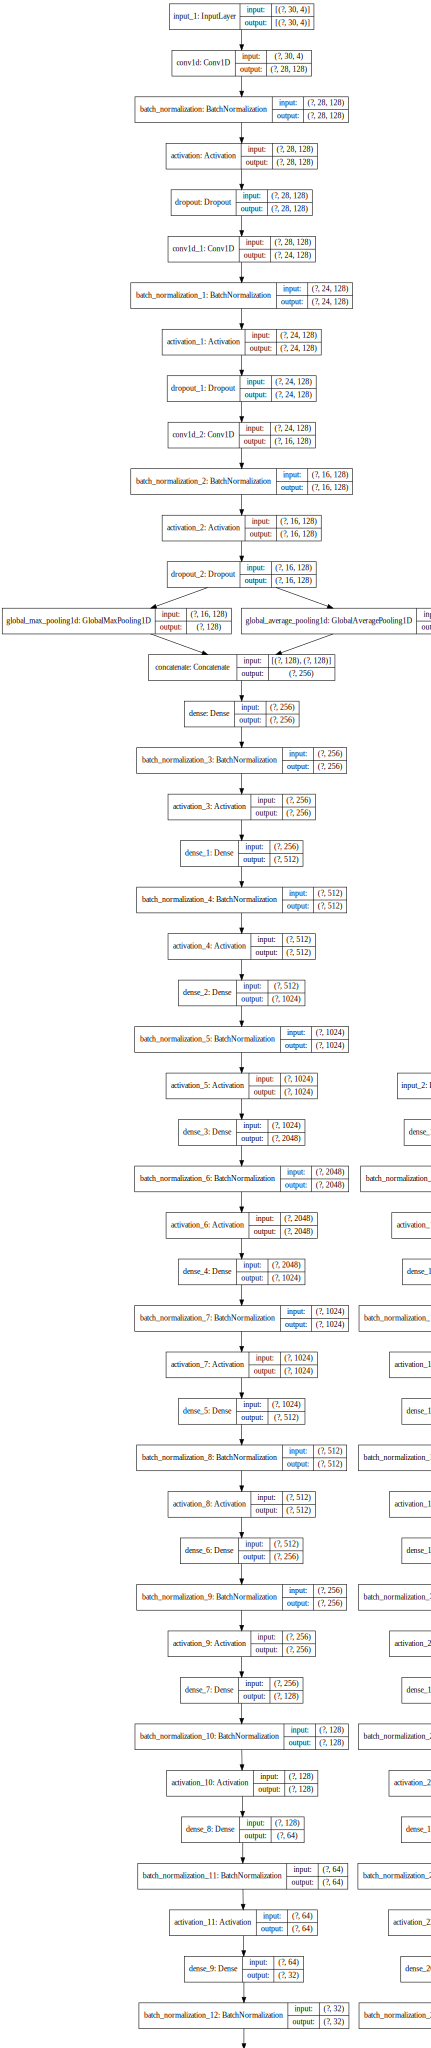

In [7]:
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

Train the model with early stopping

In [ ]:
from datetime import datetime
import os

from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
import numpy as np
from scikitplot.metrics import plot_confusion_matrix, plot_roc


class PerformanceVisualizationCallback(Callback):
    def __init__(self, model, validation_data, image_dir):
        super().__init__()
        self.model = model
        self.validation_data = validation_data
        
        os.makedirs(image_dir, exist_ok=True)
        self.image_dir = image_dir

    def on_epoch_end(self, epoch, logs={}):
        y_pred = np.asarray(self.model.predict(self.validation_data[0]))
        y_true = self.validation_data[1]             
        y_pred_class = np.argmax(y_pred, axis=1)

        # plot and save confusion matrix
        fig, ax = plt.subplots(figsize=(16,12))
        chart = plot_confusion_matrix(y_true, y_pred_class, ax=ax)
        fig.savefig(os.path.join(self.image_dir, f'confusion_matrix_epoch_{epoch}'))
        plt.display(chart)
        plt.show()
        
       # plot and save roc curve
        fig, ax = plt.subplots(figsize=(16,12))
        plot_roc(y_true, y_pred, ax=ax)
        chart = fig.savefig(os.path.join(self.image_dir, f'roc_curve_epoch_{epoch}'))
        plt.display(chart)
        plt.show()

timestamp = datetime.now().strftime("%Y%m%d-%H%M%S") 
logdir = "logs\\scalars\\" + timestamp

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
model_path = "C:\\save_model\\" + xfileName + timestamp
checkpoint_val_loss = ModelCheckpoint(model_path + "_" + ".val_loss.{val_loss:.2f}", monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = False)
checkpoint_val_Precision_0 = ModelCheckpoint(model_path + "_" + ".val_Precision_0.{val_Precision_0:.2f}", monitor='val_Precision_0', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = False)
checkpoint_val_Precision_0_075 = ModelCheckpoint(model_path + "_" + ".val_Precision_0_075.{val_Precision_0_075:.2f}", monitor='val_Precision_0_075', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = False)
checkpoint_val_Precision_0_080 = ModelCheckpoint(model_path + "_" + ".val_Precision_0_080.{val_Precision_0_080:.2f}", monitor='val_Precision_0_080', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = False)
checkpoint_val_Precision_0_085 = ModelCheckpoint(model_path + "_" + ".val_Precision_0_085.{val_Precision_0_085:.2f}", monitor='val_Precision_0_085', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = False)
checkpoint_val_Precision_0_090 = ModelCheckpoint(model_path + "_" + ".val_Precision_0_090.{val_Precision_0_090:.2f}", monitor='val_Precision_0_090', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = False)
checkpoint_val_Precision_1 = ModelCheckpoint(model_path +"_"  + ".val_Precision_1.{val_Precision_1:.2f}", monitor='val_Precision_1', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = False)
checkpoint_val_Precision_1_075 = ModelCheckpoint(model_path + "_" + ".val_Precision_1_075.{val_Precision_1_075:.2f}", monitor='val_Precision_1_075', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = False)
checkpoint_val_Precision_1_080 = ModelCheckpoint(model_path + "_" + ".val_Precision_1_080.{val_Precision_1_080:.2f}", monitor='val_Precision_1_080', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = False)
checkpoint_val_Precision_1_085 = ModelCheckpoint(model_path + "_" + ".val_Precision_1_085.{val_Precision_1_085:.2f}", monitor='val_Precision_1_085', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = False)
checkpoint_val_Precision_1_090 = ModelCheckpoint(model_path + "_" + ".val_Precision_1_090.{val_Precision_1_090:.2f}", monitor='val_Precision_1_090', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = False)
 


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', min_delta=0.0001, cooldown=5, min_lr=0.001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=100) 
performance_cbk = PerformanceVisualizationCallback(
                      model=model,
                      validation_data=v_dataset,
                      image_dir='performance_vizualizations')

callbacks_list = [checkpoint_val_loss,
                  checkpoint_val_Precision_0,
                  checkpoint_val_Precision_0_075,
                  checkpoint_val_Precision_0_080,
                  checkpoint_val_Precision_0_085,
                  checkpoint_val_Precision_0_090,                  
                  checkpoint_val_Precision_1,
                  checkpoint_val_Precision_1_075,
                  checkpoint_val_Precision_1_080,
                  checkpoint_val_Precision_1_085,
                  checkpoint_val_Precision_1_090,
#                  early,
                   reduceLROnPlat
                 , tensorboard_callback
                  
                 ]


from IPython.display import clear_output
model.fit(train_dataset,
                      validation_data = v_dataset, 
#                       batch_size = 10,
                      epochs = 3000,
                      use_multiprocessing = True,
                      callbacks = callbacks_list)

# model.fit([train_X, train_X2], [train_y, train_y],
#                       validation_data = ([valid_X, valid_X2], [valid_y, valid_y]), 
#                       batch_size = batch_size,
#                       epochs = 500,
#                       callbacks = callbacks_list)

#clear_output()

In [ ]:
# model.fit(train_dataset,
#                       validation_data = v_dataset, 
# #                       batch_size = 10,
#                       epochs = 3000,
#                       use_multiprocessing = True,
#                       callbacks = callbacks_list)

In [ ]:
#model = tf.keras.models.load_model('./xau_usd_cross-360p-high2Tp1Cl100VpConc.0.69.hdf5')

# export_path = './model/1'
# tf.saved_model.save(model, export_path)



In [ ]:
#model.load_weights('xau_usd_cross-360p-high2Tp1Cl100VpConc.0.69.hdf5')
# model.load_weights(weight_path)


lstm_results = model.evaluate(test_dataset, return_dict=True)
print(lstm_results)

In [ ]:
print(lstm_results)


In [ ]:
model.save_weights('./trained_model.h5', overwrite=True)

Load and normalize the test data

In [ ]:
def load_test(ts_length = 150000):
    base_dir = 'input/test/'
    test_files = [f for f in listdir(base_dir) if isfile(join(base_dir, f))]

    ts = np.empty([len(test_files), ts_length])
    ids = []
    
    i = 0
    for f in tqdm_notebook(test_files):
        ids.append(splitext(f)[0])
        t_df = pd.read_csv(base_dir + f, dtype={"acoustic_data": np.int8})
        ts[i, :] = t_df['acoustic_data'].values
        i = i + 1

    return ts, ids

In [ ]:
test_data, test_ids = load_test()

In [ ]:
X_test = test_data
X_test = np.expand_dims(X_test, 2)
X_test.shape

Load best model and predict

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
submission_df = pd.DataFrame({'seg_id': test_ids, 'time_to_failure': y_pred[:, 0]})

In [ ]:
submission_df.to_csv("submission.csv", index=False)

<a href="submission.csv"> Download File </a>



In [ ]:
lb.transform([-1, 0, 1])

In [ ]:
import numpy as np
nn = np.array([[1., 0.,2], [2., 1.,3], [0., 0.,4]])
print(nn[1, -1])

In [ ]:
 
print(valid_X)


In [ ]:

print(valid_X2)

In [ ]:
print(train_dataset.take(2))

In [ ]:
model.compile(optimizer=optimizer, 
                          loss='categorical_crossentropy',
                          loss_weights=[1., 1.]
#                           loss_weights=[1.]
#               
                            , metrics=[Recall(thresholds=0.5, class_id=0, top_k=1)
                                 , Recall(thresholds=0.5, class_id=2, top_k=1)
                                   , Precision(thresholds=0.5, class_id=0, top_k=1)
                                  , Precision(thresholds=0.5, class_id=2, top_k=1)
                                  ]
             )
model.summary()

In [ ]:
print(tf.__version__)

In [ ]:
from tensorflow.keras.models import Model, load_model
model = load_model('./xau_usd_cross-360p-high2Tp1Cl100VpConc.1.13.hdf5')
model.save('./model/')

In [ ]:
# Load save model pd file back to keras model for evaluate
model2 = tensorflow.keras.models.load_model('C:/save_model/xau_usd_3.0Tp3.0Cl100Vp.txt20231106-164636_.val_Precision_2_090.1.00/')
print(model2.evaluate(test_dataset, return_dict=True))


In [ ]:
# Load save model pd file back to keras model for evaluate
model2 = tensorflow.keras.models.load_model('C:/save_model/xau_usd_3.0Tp3.0Cl100Vp.txt20231105-182526_.val_Precision_2_075.0.67/')
print(model2.evaluate(test_dataset, return_dict=True))


In [ ]:
# Load save model pd file back to keras model for evaluate
model2 = tensorflow.keras.models.load_model('C:/save_model/xau_usd_3.0Tp3.0Cl100Vp.txt20231105-140443_.val_Precision_2_080.0.80/')
lstm_results = model2.evaluate(test_dataset, return_dict=True)
print(lstm_results)

In [ ]:
# Load save model pd file back to keras model for evaluate
model2 = tensorflow.keras.models.load_model('C:/save_model/xau_usd_3.0Tp3.0Cl100Vp.txt20231104-144540_.val_Precision_0_085.0.79/')
lstm_results = model2.evaluate(v_dataset, return_dict=True)
print(lstm_results)

In [ ]:
 
for x in train_dataset_x:
    print(x)

In [ ]:
import tensorflow as tf
string_vals=tf.compat.v1.string_split(['1,2,3'],delimiter=',').values
string_vals = tf.compat.v1.string_to_number(string_vals, tf.float32)
input_tensor = tf.constant(string_vals, dtype=tf.float32)
reshaped_tensor = tf.reshape(input_tensor, shape=(1, -1, 1))
print(reshaped_tensor)